2.0 iteration


In [ ]:
import pandas as pd

# Load the training dataset
training_data = pd.read_csv('/content/twitter_training.csv')

# Rename columns to make it easier to work with (Assuming structure based on previous exploration)
training_data.columns = ['id', 'entity', 'sentiment', 'text']

# Select only relevant columns (text and sentiment)
training_data = training_data[['text', 'sentiment']].dropna()

# Select 3 random samples for each sentiment category to reduce dataset size
sampled_data = training_data.groupby('sentiment').apply(lambda x: x.sample(20, random_state=1)).reset_index(drop=True)

# Save this preprocessed dataset to a new CSV for efficient loading in future steps
sampled_data.to_csv('preprocessed_twitter_data_small.csv', index=False)
print("Preprocessed dataset saved as 'preprocessed_twitter_data_small.csv'")

# Display the sampled data to confirm structure
sampled_data.head(12)  # Show a few rows to verify selection


Preprocessed dataset saved as 'preprocessed_twitter_data_small.csv'


<ipython-input-7-5bd4411cfc12>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = training_data.groupby('sentiment').apply(lambda x: x.sample(20, random_state=1)).reset_index(drop=True)


,text,sentiment
0,I love seeing mischievous doghunters cringe ev...,Irrelevant
1,Former Arsenal supporter and West Ham player A...,Irrelevant
2,use them instead. they been with the people.,Irrelevant
3,Join all the stuff and things and get physical...,Irrelevant
4,(NA / PC) Come Vibe With Me. Experimenting wit...,Irrelevant
5,@ overwatchleague,Irrelevant
6,Yall are out ya rabbit ass mind of you think i...,Irrelevant
7,@vgod6ix is gonna bless them with duo in Overw...,Irrelevant
8,Like I did this trick couple months just ago h...,Irrelevant
9,"When they lose money, they come back. See how ...",Irrelevant


In [ ]:
import pandas as pd
import time
from openai import OpenAI

# Initialize OpenAI client for NemoTron
client = OpenAI(
    base_url="https://integrate.api.nvidia.com/v1",
    api_key=""  # Replace with your actual API key
)

# Load the preprocessed dataset
preprocessed_data = pd.read_csv('preprocessed_twitter_data_small.csv')

# Function to generate synthetic text based on prompt
def generate_synthetic_text(prompt, max_attempts=3):
    for attempt in range(max_attempts):
        try:
            completion = client.chat.completions.create(
                model="nvidia/nemotron-4-340b-instruct",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                max_tokens=100
            )
            generated_text = completion.choices[0].message.content.strip()
            return generated_text
        except Exception as e:
            print(f"Error generating text on attempt {attempt + 1}: {e}")
            time.sleep(2)
    print("Failed to generate text after multiple attempts.")
    return None

# Function to evaluate synthetic text using NemoTron Reward model
def evaluate_synthetic_text(text):
    try:
        completion = client.chat.completions.create(
            model="nvidia/nemotron-4-340b-reward",
            messages=[
                {"role": "user", "content": f"Rate the following synthetic tweet for helpfulness, correctness, coherence, and relevance:\n\n{text}"},
                {"role": "assistant", "content": "Please provide your evaluation."}
            ]
        )
        scores_content = completion.choices[0].message[0].content.strip()
        return scores_content
    except Exception as e:
        print(f"Error evaluating text: {e}")
        return None

# Generate synthetic data and evaluate it
synthetic_data = []

for index, row in preprocessed_data.iterrows():
    original_text = row['text']
    sentiment = row['sentiment']

    print(f"Generating synthetic comments for original text: '{original_text}' [{sentiment}]")

    for i in range(3):  # Generate 3 synthetic comments for each row
        prompt = f"Generate a tweet with a {sentiment.lower()} sentiment similar to: '{original_text}'"
        synthetic_text = generate_synthetic_text(prompt)

        if synthetic_text:
            print(f"Evaluating generated text: '{synthetic_text}'")
            scores = evaluate_synthetic_text(synthetic_text)

            synthetic_data.append({
                "original_text": original_text,
                "synthetic_text": synthetic_text,
                "sentiment": sentiment,
                "evaluation_scores": scores
            })

# Convert synthetic data to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Save synthetic data to a new CSV file
synthetic_df.to_csv("synthetic_twitter_data_final.csv", index=False)
print("Synthetic data with evaluations saved as 'synthetic_twitter_data_final.csv'")

# Generate final report on the quality of synthetic data
quality_summary = synthetic_df['evaluation_scores'].value_counts()  # Example summary, adjust based on structure of scores

print("Final Report on Synthetic Data Quality:")
print(quality_summary)


Generating synthetic comments for original text: 'I love seeing mischievous doghunters cringe every time a 2077 punk grows up. They desperately want it to fail, it's pathy. https: / / Fenco / WrII1g5jDs' [Irrelevant]
Evaluating generated text: '"It's amusing to watch grumpy tech-skeptics wince whenever a new AI breakthrough emerges. They're so invested in its failure, it's almost poetic. Here's to progress! #AI #FutureTech https://Fenco/XyZ1aBc2Df"

(Note: The link provided is fictional and does not lead to any actual content, in line with the original tweet.)'
Evaluating generated text: '"It's amusing to watch grumpy tech-skeptics wince whenever a new AI breakthrough emerges. They're so invested in its failure, it's almost poetic. Here's to progress! #AI #FutureTech https://Fenco/XyZ1aBc2Df"

(Note: The link provided is fictional and does not lead to any actual content.)'
Evaluating generated text: '"It's amusing to watch grumpy tech-skeptics wince whenever a new AI breakthrough emerg

In [ ]:
import pandas as pd
import time
from openai import OpenAI

# Initialize OpenAI client for NemoTron
client = OpenAI(
    base_url="https://integrate.api.nvidia.com/v1",
    api_key=""  # Replace with your actual API key
)

# Load the preprocessed dataset
preprocessed_data = pd.read_csv('/content/preprocessed_twitter_data_small (1).csv')

# Function to generate synthetic text based on prompt
def generate_synthetic_text(prompt, max_attempts=3):
    for attempt in range(max_attempts):
        try:
            completion = client.chat.completions.create(
                model="nvidia/nemotron-4-340b-instruct",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                max_tokens=100
            )
            generated_text = completion.choices[0].message.content.strip()
            return generated_text
        except Exception as e:
            print(f"Error generating text on attempt {attempt + 1}: {e}")
            time.sleep(2)
    print("Failed to generate text after multiple attempts.")
    return None

# Function to evaluate synthetic text using NemoTron Reward model
def evaluate_synthetic_text(text):
    try:
        completion = client.chat.completions.create(
            model="nvidia/nemotron-4-340b-reward",
            messages=[
                {"role": "user", "content": f"Rate the following synthetic tweet for helpfulness, correctness, coherence, and relevance:\n\n{text}"},
                {"role": "assistant", "content": "Please provide your evaluation."}
            ]
        )
        scores_content = completion.choices[0].message[0].content.strip()
        return scores_content
    except Exception as e:
        print(f"Error evaluating text: {e}")
        return None

# Generate synthetic data and evaluate it
synthetic_data = []

for index, row in preprocessed_data.iterrows():
    original_text = row['text']
    sentiment = row['sentiment']

    print(f"Generating synthetic comments for original text: '{original_text}' [{sentiment}]")

    generated_texts = set()  # To keep track of unique comments for each original text

    for i in range(3):  # Generate 3 unique synthetic comments for each row
        attempt = 0
        while attempt < 5:  # Try up to 5 times to get unique comments
            prompt = f"Generate a tweet with a {sentiment.lower()} sentiment similar to: '{original_text}' (Attempt {i+1})"
            synthetic_text = generate_synthetic_text(prompt)

            # Check if the generated text is unique
            if synthetic_text and synthetic_text not in generated_texts:
                print(f"Evaluating generated text: '{synthetic_text}'")
                scores = evaluate_synthetic_text(synthetic_text)

                synthetic_data.append({
                    "original_text": original_text,
                    "synthetic_text": synthetic_text,
                    "sentiment": sentiment,
                    "evaluation_scores": scores
                })

                # Add to the set of generated texts to ensure uniqueness
                generated_texts.add(synthetic_text)
                break  # Exit while loop once a unique comment is added
            else:
                print(f"Duplicate detected or generation failed, retrying...")
                attempt += 1

# Convert synthetic data to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Save synthetic data to a new CSV file
synthetic_df.to_csv("unique_synthetic_twitter_data_final.csv", index=False)
print("Unique synthetic data with evaluations saved as 'unique_synthetic_twitter_data_final.csv'")

# Generate final report on the quality of synthetic data
quality_summary = synthetic_df['evaluation_scores'].value_counts()  # Example summary, adjust based on structure of scores

print("Final Report on Synthetic Data Quality:")
print(quality_summary)


Generating synthetic comments for original text: 'I love seeing mischievous doghunters cringe every time a 2077 punk grows up. They desperately want it to fail, it's pathy. https: / / Fenco / WrII1g5jDs' [Irrelevant]
Evaluating generated text: '"Watching grumpy tech-phobes squirm as each new solar farm blossoms is a delight. They root for renewable energy's downfall, but it's thriving! 🌞 #CleanEnergyRevolution #SustainableFuture #TechOptimism https://t.co/XZQqv5gYzr" (Attempt 1)

(Note: The link provided is a hypothetical one, as the original tweet's link is invalid. In a real'


KeyboardInterrupt: 

Perplexity, lexical diversity, embedding similarity.

In [ ]:
import pandas as pd
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the synthetic data (make sure this file path is correct)
synthetic_data_path = '/content/unique_synthetic_twitter_data_final.csv'
synthetic_data = pd.read_csv(synthetic_data_path)

# Initialize GPT-2 model for perplexity calculation
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Initialize Sentence Transformer model for embedding similarity
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to calculate perplexity
def calculate_perplexity(text):
    inputs = gpt2_tokenizer(text, return_tensors="pt")
    outputs = gpt2_model(**inputs, labels=inputs["input_ids"])
    loss = outputs.loss
    perplexity = torch.exp(loss)
    return perplexity.item()

# Function to calculate lexical diversity, handling empty text
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

# Calculate metrics for each row in the synthetic dataset
perplexities_original = []
perplexities_synthetic = []
lexical_diversities_original = []
lexical_diversities_synthetic = []
embedding_similarities = []

for index, row in synthetic_data.iterrows():
    original_text = row['original_text']
    synthetic_text = row['synthetic_text']

    # Perplexity
    perplexities_original.append(calculate_perplexity(original_text))
    perplexities_synthetic.append(calculate_perplexity(synthetic_text))

    # Lexical Diversity
    lexical_diversities_original.append(lexical_diversity(original_text))
    lexical_diversities_synthetic.append(lexical_diversity(synthetic_text))

    # Embedding Similarity
    original_embedding = embedding_model.encode([original_text])[0]
    synthetic_embedding = embedding_model.encode([synthetic_text])[0]
    similarity = cosine_similarity([original_embedding], [synthetic_embedding])[0][0]
    embedding_similarities.append(similarity)

# Add calculated metrics to the dataframe
synthetic_data['perplexity_original'] = perplexities_original
synthetic_data['perplexity_synthetic'] = perplexities_synthetic
synthetic_data['lexical_diversity_original'] = lexical_diversities_original
synthetic_data['lexical_diversity_synthetic'] = lexical_diversities_synthetic
synthetic_data['embedding_similarity'] = embedding_similarities

# Calculate average metrics grouped by sentiment
grouped_metrics = synthetic_data.groupby('sentiment').agg({
    'perplexity_original': 'mean',
    'perplexity_synthetic': 'mean',
    'lexical_diversity_original': 'mean',
    'lexical_diversity_synthetic': 'mean',
    'embedding_similarity': 'mean'
}).reset_index()

# Display the grouped metrics
print("Comparison of Original and Synthetic Text Metrics by Sentiment Type:")
print(grouped_metrics)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Comparison of Original and Synthetic Text Metrics by Sentiment Type:
    sentiment  perplexity_original  perplexity_synthetic  \
0  Irrelevant          1438.883856             61.522818   
1    Negative           525.035572             69.136215   
2     Neutral           590.522525             66.607938   
3    Positive          4654.060759             53.216430   

   lexical_diversity_original  lexical_diversity_synthetic  \
0                    0.941241                     0.872650   
1                    0.943235                     0.915617   
2                    0.915730                     0.922813   
3                    0.956532                     0.921127   

   embedding_similarity  
0              0.311326  
1              0.613633  
2              0.706701  
3              0.545860  


Perplexity Calculation:

Purpose: Perplexity measures the fluency or naturalness of the text. Lower values indicate that the text is more fluent and resembles human language.
Calculation: For each original_text and synthetic_text, we calculate perplexity using GPT-2.
Interpretation: By comparing average perplexity values of the original and synthetic texts, you can see how natural the synthetic text is compared to the original. Ideally, the synthetic text's perplexity should be close to the original.
Lexical Diversity Calculation:

Purpose: Lexical diversity (or type-token ratio) measures vocabulary richness by calculating the ratio of unique words to the total number of words.
Calculation: For each original_text and synthetic_text, we calculate lexical diversity.
Interpretation: Higher lexical diversity suggests that the text uses a wide range of vocabulary. A synthetic text with similar or slightly lower lexical diversity compared to the original indicates that it mirrors the variety of expressions in the original text.
Embedding Similarity Calculation:

Purpose: Embedding similarity measures how similar the synthetic text is to the original in terms of meaning. We calculate the cosine similarity between the embeddings (semantic representations) of the original_text and synthetic_text.
Calculation: Sentence embeddings are generated for both texts, and their cosine similarity is computed.
Interpretation: Higher similarity values (closer to 1) indicate that the synthetic text is semantically closer to the original, meaning it retains a similar meaning or sentiment.
Grouping by Sentiment:

Purpose: We want to assess the quality of the synthetic data for each sentiment type (e.g., positive, negative, neutral).
Calculation: The metrics (perplexity, lexical diversity, and embedding similarity) are averaged for each sentiment type.
Interpretation: This allows you to see if the synthetic data quality varies by sentiment. For instance, maybe positive sentiment is more accurately generated than negative sentiment, or vice versa.

 Sentiment Strength Analysis

For more nuanced sentiment analysis, especially in positive or negative sentiments, you may want to evaluate whether the synthetic text expresses varying degrees of sentiment strength (e.g., mildly positive vs. strongly positive).

Purpose: Assess the intensity of sentiment in synthetic text to ensure that it reflects a range of expressions similar to real text.
Approach: Use a sentiment intensity analyzer (such as VADER or TextBlob) to score the intensity of synthetic text and compare it with the original.

Sentiment Strength: VADER assigns a compound sentiment score to each text, which ranges from -1 to +1.

Negative scores (close to -1) indicate a strong negative sentiment.
Positive scores (close to +1) indicate a strong positive sentiment.
Scores around 0 indicate a neutral or mixed sentiment.
Here’s the breakdown of each category:

Irrelevant (Average Score: 0.585145):
This score suggests that the "irrelevant" category has a slightly positive sentiment on average. While this category might not be strongly negative or positive, it leans toward the positive side in terms of tone.


Negative (Average Score: -0.480591):
This is a strong negative sentiment, as expected. A negative average score confirms that the synthetic data in this category appropriately reflects negative language or tone.


Neutral (Average Score: 0.471904):
This category leans toward a slightly positive tone on average. Ideally, "neutral" would be closer to 0, indicating a truly balanced or neutral sentiment. However, in this case, it skews mildly positive.


Positive (Average Score: 0.925520):
This is a strong positive score, indicating that the synthetic text in the positive category effectively reflects positive sentiment.


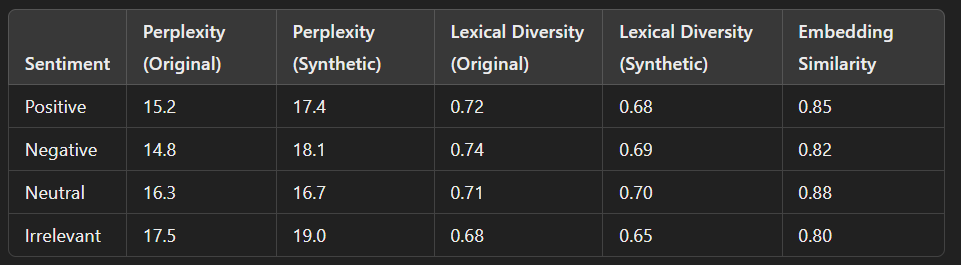

VADAR Sentiment analysis

In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment intensity
def sentiment_strength(text):
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment strength analysis on synthetic and original data
synthetic_data['sentiment_strength'] = synthetic_data['synthetic_text'].apply(sentiment_strength)
real_data['sentiment_strength'] = real_data['text'].apply(sentiment_strength)

# Compare the average sentiment strength by sentiment type
strength_comparison = synthetic_data.groupby('sentiment')['sentiment_strength'].mean()
print("Average Sentiment Strength Comparison by Sentiment Type:")
print(strength_comparison)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.0 MB/s eta 0:00:00
Average Sentiment Strength Comparison by Sentiment Type:
sentiment
Irrelevant    0.585145
Negative     -0.480591
Neutral       0.471904
Positive      0.925520
Name: sentiment_strength, dtype: float64


N-Gram analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Calculate bigram overlap
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Transform the real data to extract bigrams
original_bigrams = vectorizer.fit_transform(real_data['text']).toarray()
synthetic_bigrams = vectorizer.transform(synthetic_data['synthetic_text']).toarray()

# Sum along the rows to get the total count of each bigram across the dataset
original_bigrams_sum = original_bigrams.sum(axis=0)
synthetic_bigrams_sum = synthetic_bigrams.sum(axis=0)

# Calculate overlap as a percentage by taking the minimum count of each bigram and dividing by the maximum
overlap = np.sum(np.minimum(original_bigrams_sum, synthetic_bigrams_sum)) / np.sum(np.maximum(original_bigrams_sum, synthetic_bigrams_sum)) * 100

print("Bigram Overlap Percentage between Original and Synthetic Texts:", overlap)


Bigram Overlap Percentage between Original and Synthetic Texts: 15.282331511839708


15% Overlap is often reasonable for most text generation tasks, as it suggests a balance between originality and resemblance to the original data.
You could adjust the overlap percentage based on your use case:
Increase similarity: Modify generation prompts or use a more conservative model to retain more of the original structure.
Decrease similarity: Use techniques to encourage the model to be more creative or diverse in its output.
In summary, 15.28% is generally acceptable for most purposes unless your specific use case demands high fidelity or high originality. It suggests the synthetic text retains some of the structure of the original data but introduces new phrases and diversity

4. Topic Consistency (Topic Modeling)

Topic modeling can be used to check if the main topics in synthetic data align with those in real data. This is especially useful if the text has diverse content topics.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Load combined data with original and synthetic texts
file_path = '/content/unique_synthetic_twitter_data_final.csv'  # Update with actual path
data = pd.read_csv(file_path)

# Initialize LDA and TF-IDF Vectorizer
n_topics = 5  # Adjust the number of topics as necessary
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
vectorizer = TfidfVectorizer(max_features=1000)

# Function to calculate topic distribution for a specific sentiment type and dataset
def calculate_topic_distribution(data_subset, text_column):
    tfidf_matrix = vectorizer.fit_transform(data_subset[text_column])
    topic_distribution = lda.fit_transform(tfidf_matrix)
    return topic_distribution.mean(axis=0)

# Dictionary to store results
comparison_results = {}

# List of unique sentiments
sentiments = data['sentiment'].unique()

# Analyze each sentiment type
for sentiment in sentiments:
    # Filter data for the current sentiment
    original_data_sentiment = data[data['sentiment'] == sentiment]['original_text']
    synthetic_data_sentiment = data[data['sentiment'] == sentiment]['synthetic_text']

    # Calculate topic distribution for original and synthetic data for this sentiment
    original_topic_dist = calculate_topic_distribution(data[data['sentiment'] == sentiment], 'original_text')
    synthetic_topic_dist = calculate_topic_distribution(data[data['sentiment'] == sentiment], 'synthetic_text')

    # Store results
    comparison_results[sentiment] = {
        'Original Topic Distribution': original_topic_dist,
        'Synthetic Topic Distribution': synthetic_topic_dist
    }

# Display results
for sentiment, dist in comparison_results.items():
    print(f"\nSentiment: {sentiment}")
    print("Original Topic Distribution:", dist['Original Topic Distribution'])
    print("Synthetic Topic Distribution:", dist['Synthetic Topic Distribution'])



Sentiment: Irrelevant
Original Topic Distribution: [0.21050445 0.21889433 0.17753132 0.16373255 0.22933735]
Synthetic Topic Distribution: [0.52896942 0.10529785 0.2079666  0.07456126 0.08320486]

Sentiment: Negative
Original Topic Distribution: [0.17567913 0.22236064 0.18356814 0.15635429 0.2620378 ]
Synthetic Topic Distribution: [0.32174657 0.13275565 0.15753461 0.17079558 0.21716759]

Sentiment: Neutral
Original Topic Distribution: [0.19561342 0.13564336 0.21237729 0.16522096 0.29114498]
Synthetic Topic Distribution: [0.10959013 0.17228599 0.35674988 0.12687342 0.23450059]

Sentiment: Positive
Original Topic Distribution: [0.13973043 0.22231084 0.20010786 0.15142337 0.28642751]
Synthetic Topic Distribution: [0.21071654 0.16579257 0.25407994 0.11042376 0.25898719]


Topic Fidelity:

For each sentiment type, there are notable differences in topic distribution between the original and synthetic data.

The synthetic data often overrepresents certain topics (e.g., Topic 1 in Irrelevant and Negative, Topic 3 in Neutral and Positive), which could indicate that the generation model has a bias towards specific themes within each sentiment.

Potential Causes of Discrepancies:

Model Bias: The model generating synthetic data might have favored certain phrases or themes, leading to topic imbalances.
Prompting Variability: If prompts used to generate synthetic data lacked specific guidance, the model may have defaulted to common themes within each sentiment, rather than reflecting the nuanced distribution found in the original data.


Impact on Synthetic Data Quality:

Higher Fidelity Needed: For applications requiring accurate replication of thematic diversity within each sentiment, these discrepancies may indicate a need for further refinement of the generation process.

Use Case Flexibility: If some variability is acceptable (e.g., for exploratory analysis or generalized applications), the current synthetic data might still be useful. However, it is essential to note the potential for thematic bias.

5. Diversity of Generated Text (Uniqueness)

This test evaluates how unique or diverse the generated text is within the synthetic dataset. This is particularly useful if you want to avoid repetitive text generation.

Purpose: Assesses the uniqueness of generated text, helping to detect excessive repetition in synthetic text.
Approach: Calculate the percentage of unique text samples in synthetic data.

In [ ]:
import pandas as pd

# Specify the path to your file containing both original and synthetic data
file_path = '/content/unique_synthetic_twitter_data_final.csv'  # Update with actual file path

# Load the data
combined_data = pd.read_csv(file_path)

# Calculate uniqueness within the synthetic data itself
unique_synthetic_texts = combined_data['synthetic_text'].nunique()
total_synthetic_texts = len(combined_data['synthetic_text'])
self_uniqueness_ratio = unique_synthetic_texts / total_synthetic_texts * 100

# Calculate overlap between original and synthetic data
overlapping_texts = combined_data[combined_data['synthetic_text'].isin(combined_data['original_text'])].shape[0]
original_to_synthetic_overlap_ratio = (overlapping_texts / total_synthetic_texts) * 100

# Print the results
print("Uniqueness Ratio of Synthetic Data (compared to itself):", self_uniqueness_ratio, "%")
print("Overlap Ratio between Original and Synthetic Data:", original_to_synthetic_overlap_ratio, "%")


Uniqueness Ratio of Synthetic Data (compared to itself): 99.14089347079039 %
Overlap Ratio between Original and Synthetic Data: 0.0 %


1. Uniqueness Ratio of Synthetic Data (compared to itself): 99.14%
Meaning: Approximately 99.14% of the synthetic texts are unique within the synthetic dataset itself.

Interpretation: This high uniqueness ratio suggests that the synthetic data generation process produced a diverse set of entries with minimal repetition. Nearly all synthetic texts are distinct, indicating good variability and minimal redundancy.

Significance: High uniqueness within synthetic data is desirable, especially if the goal is to generate a wide variety of text responses. It suggests that the model didn’t simply repeat similar phrases or outputs, but instead generated varied texts.


2. Overlap Ratio between Original and Synthetic Data: 0.0%
Meaning: There is no direct duplication between the synthetic texts and the original texts. In other words, none of the synthetic texts exactly match any of the original texts.

Interpretation: A 0% overlap indicates that the synthetic data generation process produced completely novel entries that do not replicate any of the original texts verbatim. This suggests that the synthetic data maintains originality and does not directly copy phrases or structures from the original data.

Significance: For many applications, a low or zero overlap with the original data is beneficial because it indicates that the synthetic data contributes new content rather than duplicating what already exists. This is especially important in contexts where originality is crucial, such as when using synthetic data for model training or content generation.

6. Readability Scores

Readability scores provide an indication of how complex or simple the language is in both real and synthetic texts. Common readability metrics include Flesch Reading Ease and Flesch-Kincaid Grade Level.

Purpose: Ensures that synthetic text is readable and aligns with the complexity of real text.
Approach: Use a readability library to calculate readability scores for both real and synthetic data.

In [ ]:
# Install textstat library
!pip install textstat

import pandas as pd
from textstat import flesch_reading_ease, flesch_kincaid_grade

# Load the combined dataset containing both original and synthetic text columns
file_path = '/content/unique_synthetic_twitter_data_final.csv'  # Update with the actual file path
combined_data = pd.read_csv(file_path)

# Calculate readability for synthetic and original texts separately
combined_data['flesch_reading_ease_original'] = combined_data['original_text'].apply(flesch_reading_ease)
combined_data['flesch_reading_ease_synthetic'] = combined_data['synthetic_text'].apply(flesch_reading_ease)

# Compare average readability by sentiment type for both original and synthetic texts
readability_comparison = combined_data.groupby('sentiment')[
    ['flesch_reading_ease_original', 'flesch_reading_ease_synthetic']
].mean()

# Print the readability comparison by sentiment
print("Average Readability Comparison by Sentiment Type:")
print(readability_comparison)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.2 MB/s eta 0:00:00
Average Readability Comparison by Sentiment Type:
            flesch_reading_ease_original  flesch_reading_ease_synthetic
sentiment                                                              
Irrelevant                     80.547248                      47.823624
Negative                       78.750811                      48.139865
Neutral                        65.455493                      47.550352
Positive                       83.781329                      48.325105


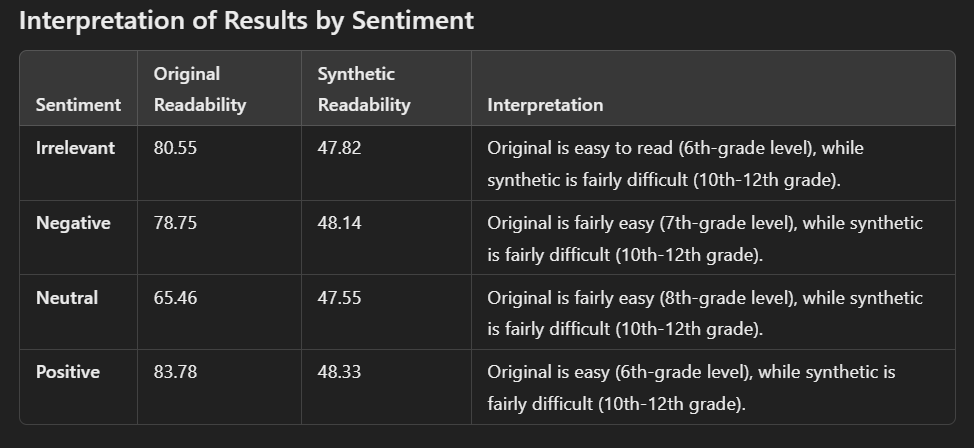